In [1]:
import os
from collections.abc import MutableMapping
from pathlib import Path

import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import yaml

from java_migration.analysis.utils import (
    MavenStatus,
    flatten,
    get_experiment_data,
    get_maven_logs,
    visualize_agent_trace,
)
from java_migration.eval.maven_build_verifier import MavenBuildVerifier
from java_migration.eval.smol_log_parser import parse_log
from java_migration.eval.utils import recover_safe_repo_name
from java_migration.utils import REPO_ROOT

In [12]:
experiment_path = Path(
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-09/22-19-56-hopeful-wescoff"
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-11/13-55-09-condescending-galileo"
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-11/14-14-38-awesome-pasteur"
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-11/15-14-25-loving-newton"
    # "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-11/16-15-09-tender-varahamihira"
    "/Users/mayvic/Documents/git/java-migration-paper/data/experiments/2025-03-11/17-59-17-recursing-leavitt"
)
exp_data = get_experiment_data(experiment_path)

In [5]:
maven_logs = {repo_name: get_maven_logs(exp_data[repo_name]) for repo_name in exp_data}
repo_names = df.repo_name.tolist()
maven_logs[repo_names[1]]

[]

In [6]:
maven_statuses_by_repo = {
    status: len(
        [repo_name for repo_name in maven_logs if any(status == step["status"] for step in maven_logs[repo_name])]
    )
    for status in MavenStatus
}
maven_statuses_by_repo

{<MavenStatus.NO_MAVEN: 0>: 0,
 <MavenStatus.COMPILE_ERROR: 1>: 2,
 <MavenStatus.TESTS_STARTED: 2>: 2,
 <MavenStatus.SUCCESS: 3>: 4,
 <MavenStatus.DEPENDENCY_ERROR: 4>: 0,
 <MavenStatus.UNKNOWN_ERROR: 5>: 0,
 <MavenStatus.UNKNOWN: 6>: 1,
 <MavenStatus.GOAL_ERROR: 7>: 4,
 <MavenStatus.PLUGIN_RESOLVE_ERROR: 8>: 1,
 <MavenStatus.INVALID_POM: 9>: 2,
 <MavenStatus.SKIPPED_TESTS: 10>: 0}

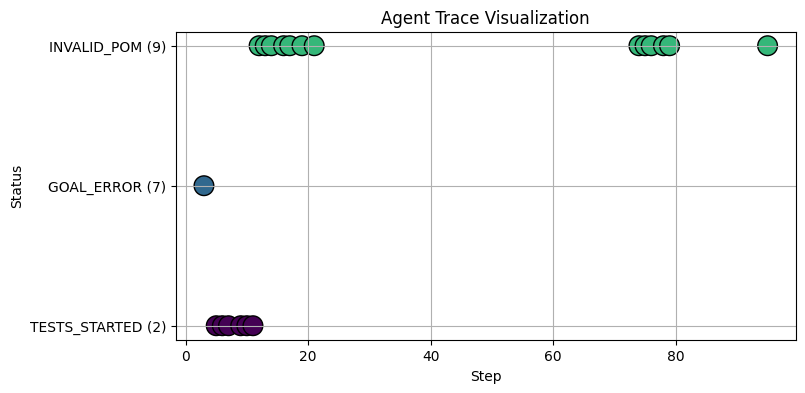

In [7]:
# print(exp_data[repo_names[12]]["agent_log"].steps[15].execution_logs)
visualize_agent_trace(maven_logs["nydiarra/springboot-jwt"])
# print(repo_names[12])